In [1]:
from __future__ import division
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd # to read excel
import seaborn as sns
from array import *
import researchpy as rp
import scipy.stats as stats
%matplotlib inline

from myfunctions import *

import datetime

In [2]:
# statistics functions

import scikit_posthocs as scp

In [3]:
# 1. Indoor system
#   a. Read data and parameters from excel file

xl = pd.ExcelFile('../data/Parameters.xlsx')
x2 = pd.ExcelFile('../data/Data.xlsx')

# Import parameters into df1
df1 = xl.parse('Parameters')

# assigmment of parameters to values: 
for key,val in zip(df1.Parameter,df1.Indoor_value):
    exec(key + '=val')
    print(key,val)

# Import indoor data into df2
df2 = x2.parse('Indoor')

df2.head()

umol_to_percent_DW 0.0014
n_days 7.0
Duration 7.0
Nint0 1.85
m0 0.15
Nintcrit 4.5
miu 0.04
Nintmax 5.5
Nintmin 0.48
Ks 14.0
Vmax 60.0
Z 0.178
KI 35.0
K0 0.5
Ka 0.05
Topt 18.0
Tmin 5.0
Tmax 35.0
n 5.0
losses20 0.0016
teta 1.047
Sopt 25.0
Smin 3.0
Smax 48.0
Shigh 30.0
Slow 12.0
KN 1.1
dNextoutdt 0.014
dNextindt 0.0
dmoutdt 0.0
Next00  4032.0
dilution 0.0


,Sample,Exp,Sleeve,Week,Stage,Timei,Timeh,Time,DW,mmi,...,Frequency,Amplitude,Duration,Flux,Sporulated,Comment,Day,Comment2,Unnamed: 38,N_Saturation
0,0.0,1,0,0.0,i,"2019,3,12,13,0","2019,3,12,13,0","2019,3,12,13,0",0.750,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,yes
1,0.7,1,0,0.0,f,"2019,3,12,13,0","2019,3,12,13,0","2019,3,19,13,0",0.753,50.0,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,yes
2,1.0,1,1,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.144,NaN,...,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN,NaN,yes
3,2.0,1,2,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.153,NaN,...,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN,NaN,yes
4,3.0,1,3,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.159,NaN,...,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN,NaN,yes


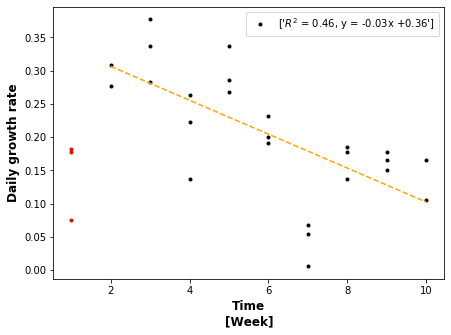

In [4]:
# S.A #1 - Time effect on growth rates
from sklearn.linear_model import LinearRegression

x = df2[(df2.Comment == 'Time effect')].Week
y = df2[(df2.Comment == 'Time effect')].DGR


fig,ax0 = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
ax0.plot(x[4:-1],y[4:-1],'.',markersize=6,color = 'k')
ax0.plot(x[0:3],y[0:3],'.',markersize=6,color = 'r')


mm, bb = np.polyfit(x[4:-1], y[4:-1], 1)
xx = np.array(x[4:-1]).reshape((-1, 1))
model = LinearRegression()
model.fit(xx, y[4:-1])
model = LinearRegression().fit(xx, y[4:-1])
r_sq = model.score(xx, y[4:-1])

ax0.plot(x[4:-1], mm*x[4:-1] + bb,'--',color = 'orange',markersize=6)

ax0.set_ylabel('Daily growth rate', fontsize=12, weight='bold')
ax0.set_xlabel('Time\n[Week]', fontsize=12, weight='bold')

#ax0.xlabel('Week')
#ax0.ylabel('DGR')

ax0.legend([['$R^{2}$ = ' + str(round(r_sq,2)) + ', y = ' + str(round(mm,2)) + 'x +' + str(round(bb,2))]])

In [5]:
mm*x[4:-1]

307   -0.051004
308   -0.051004
342   -0.076506
343   -0.076506
344   -0.076506
345   -0.102008
346   -0.102008
347   -0.102008
348   -0.127510
349   -0.127510
350   -0.127510
351   -0.153012
352   -0.153012
353   -0.153012
354   -0.178514
355   -0.178514
356   -0.178514
357   -0.204015
358   -0.204015
359   -0.204015
360   -0.229517
361   -0.229517
362   -0.229517
363   -0.255019
364   -0.255019
Name: Week, dtype: float64

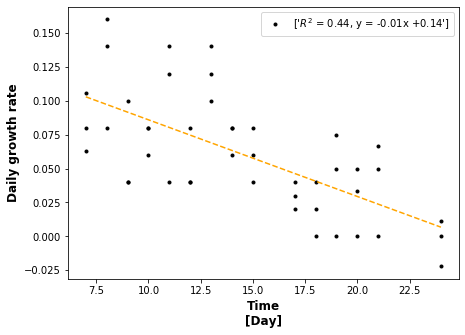

In [6]:
# S.A #1 - Starvation effect on growth rates
from sklearn.linear_model import LinearRegression

x = df2[(df2.Comment == 'Starvation')].Day
y = df2[(df2.Comment == 'Starvation')].DGR


fig,ax0 = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
ax0.plot(x,y,'.',markersize=6,color = 'k')

mm, bb = np.polyfit(x, y, 1)
xx = np.array(x).reshape((-1, 1))
model = LinearRegression()
model.fit(xx, y)
model = LinearRegression().fit(xx, y)
r_sq = model.score(xx, y)

ax0.plot(x, mm*x + bb,'--',color = 'orange',markersize=6)

ax0.set_ylabel('Daily growth rate', fontsize=12, weight='bold')
ax0.set_xlabel('Time\n[Day]', fontsize=12, weight='bold')

#ax0.xlabel('Week')
#ax0.ylabel('DGR')

ax0.legend([['$R^{2}$ = ' + str(round(r_sq,2)) + ', y = ' + str(round(mm,2)) + 'x +' + str(round(bb,2))]])

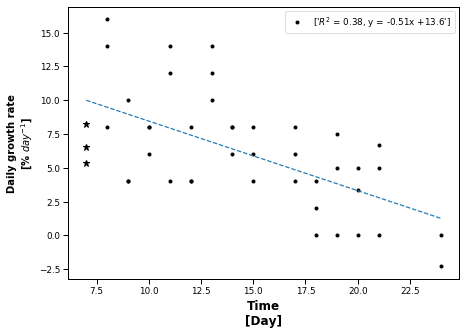

In [20]:
# S.A #1 - Starvation effect on growth rates
from sklearn.linear_model import LinearRegression

x = df2[(df2.Comment == 'Starvation')].Day
y = df2[(df2.Comment == 'Starvation')].GR


fig,ax0 = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
ax0.plot(x[3:-1],y[3:-1],'.',markersize=6,color = 'k')
ax0.plot(x[0:3],y[0:3],'*',markersize=7,color = 'k')


mm, bb = np.polyfit(x, y, 1)
xx = np.array(x).reshape((-1, 1))
model = LinearRegression()
model.fit(xx, y)
model = LinearRegression().fit(xx, y)
r_sq = model.score(xx, y)

ax0.plot(x, mm*x + bb,'--',markersize=6)

ax0.set_ylabel('Daily growth rate\n[% $day^{-1}$]', fontsize=10, weight='bold')
ax0.set_xlabel('Time\n[Day]', fontsize=12, weight='bold')

#ax0.xlabel('Week')
#ax0.ylabel('DGR')

ax0.legend([['$R^{2}$ = ' + str(round(r_sq,2)) + ', y = ' + str(round(mm,2)) + 'x +' + str(round(bb,2))]])

In [8]:
# Import data and parameters

xl = pd.ExcelFile('../data/Parameters.xlsx')
x2 = pd.ExcelFile('../data/Data.xlsx')

# Import parameters into df1
df1 = xl.parse('Parameters',header=None)

# Import indoor data into df2
df2 = x2.parse('Indoor')

# Import offshore data ito df2
df3 = x2.parse('Offshore')

# Import outdoor data ito df4
df4 = x2.parse('Outdoor')

In [9]:
df2.head()

,Sample,Exp,Sleeve,Week,Stage,Timei,Timeh,Time,DW,mmi,...,Frequency,Amplitude,Duration,Flux,Sporulated,Comment,Day,Comment2,Unnamed: 38,N_Saturation
0,0.0,1,0,0.0,i,"2019,3,12,13,0","2019,3,12,13,0","2019,3,12,13,0",0.750,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,yes
1,0.7,1,0,0.0,f,"2019,3,12,13,0","2019,3,12,13,0","2019,3,19,13,0",0.753,50.0,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,yes
2,1.0,1,1,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.144,NaN,...,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN,NaN,yes
3,2.0,1,2,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.153,NaN,...,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN,NaN,yes
4,3.0,1,3,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.159,NaN,...,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN,NaN,yes


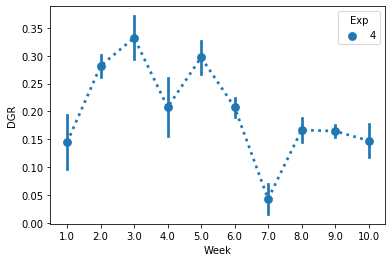

In [10]:
# weighing effect - option 2
palette = sns.color_palette("tab10",3)

d = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')]
sns.pointplot(data=d,palette=palette, x="Week", y="DGR", err_style="band", ci="sd",linestyles=':',hue = 'Exp')#,hue="Sleeve")


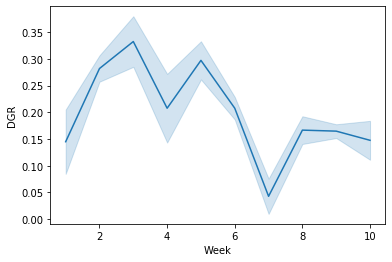

In [11]:
# weighing effect - option 2
#palette = sns.color_palette("tab10",3)

d = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')]
sns.lineplot(data=d, x="Week", y="DGR", ci="sd",err_style="band")#,hue = 'Sleeve')#,hue="Sleeve")


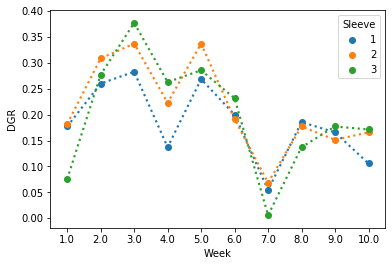

In [12]:
# weighing effect - option 2
#palette = sns.color_palette("tab10",3)

d = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')]
sns.pointplot(data=d, x="Week", y="DGR", ci="sd",err_style="bars",linestyles=[':',':',':'],hue = 'Sleeve',scale = 0.8)


In [13]:
week1 = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')&(df2.Week == 1)].DGR
week2 = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')&(df2.Week == 2)].DGR
week3 = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')&(df2.Week == 3)].DGR
week4 = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')&(df2.Week == 4)].DGR
week5 = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')&(df2.Week == 5)].DGR
week6 = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')&(df2.Week == 6)].DGR
week7 = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')&(df2.Week == 7)].DGR
week8 = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')&(df2.Week == 8)].DGR
week9 = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')&(df2.Week == 9)].DGR
week10 = df2[(df2.Stage != 'i')&(df2.Comment == 'Time effect')&(df2.Week == 10)].DGR

data = {'week1':  week1,
        'week2': week2}

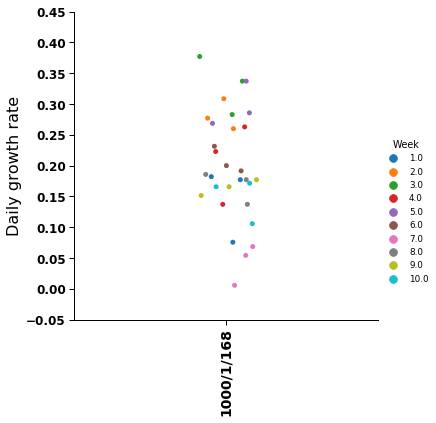

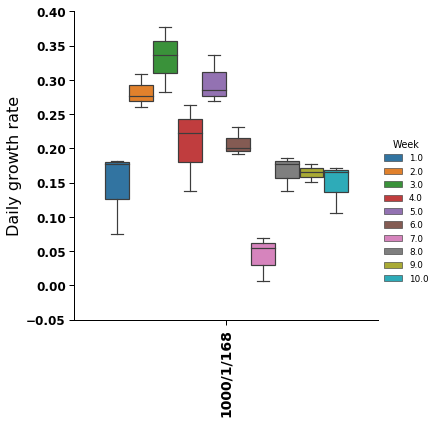

In [14]:
# S.A #1 - growth rates in different experiments
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# strip plot - all data
SA1DGR = sns.catplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Comment == 'Time effect')],hue = 'Week').set(xlabel='', ylabel='Daily growth rate')
SA1DGR.set_xticklabels(["1000/1/168", "2000/1/4", "500/1/4","2000/1/168","500/2/168","500/3/168","200/5/168"], rotation=90,fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1DGR.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})#,fontsize = 12, fontweight = bold)

# box plot
SA1DGRBOX = sns.catplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Comment == 'Time effect')],hue = 'Week',kind="box").set(xlabel='', ylabel='Daily growth rate')
SA1DGRBOX.set_xticklabels(["1000/1/168", "2000/1/4", "500/1/4","2000/1/168","500/2/168","500/3/168","200/5/168"], rotation=90,fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1DGRBOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})#,fontsize = 12, fontweight = bold)

# A combined plot
#SA1DGRBOX2 = sns.boxplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')],hue = 'Week').set(xlabel='', ylabel='Daily growth rate')
#SA1DGRBOX2 = sns.stripplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Stage == 'f')],hue = 'Week').set(xlabel='', ylabel='Daily growth rate')

# see details in https://datavizpyr.com/boxplots-with-points-using-seaborn-in-python/

# DGR without sporulated sleeves
#SA1DGR2 = sns.catplot(x = 'Treatment', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')][(df2.Comment != 'Sporulated')])#,kind="box")
#SA1DGR2.set_xticklabels(["1000/1/168", "2000/1/4", "500/1/4","2000/1/168","500/2/168","500/3/168","200/5/168"], rotation=90)

In [15]:
# statistical analysis - Longtitudinal analysis

# https://medium.com/@igoroa/analysis-of-longitudinal-data-made-easy-with-leaspy-f8d529fcb5f8

[Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '13.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '18.0'),
 Text(0, 0, '19.0'),
 Text(0, 0, '20.0'),
 Text(0, 0, '21.0'),
 Text(0, 0, '24.0')]

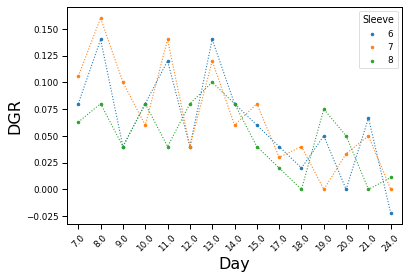

In [16]:
# S.A #1 - growth rates in starvation experiments
#Timepoints = [7,8,9,10,11,12,13,14,15,17,18,19,20,21,24]
SA1St = sns.pointplot(x = 'Day', y = 'DGR', data = df2[(df2.Treatment != 'Acclimation')&(df2.Comment == 'Starvation')],hue = 'Sleeve',scale=0.5,linestyles=[":",":",":"])
SA1St.set_xticklabels(df2[(df2.Comment == 'Starvation')&(df2.Sleeve == 6)]['Day'],rotation=45)